# Traitement d'images : filtrage, seuillage, et comptage d'objets avec opencv

Une initiation à la biblithèque opencv 

# Veille technologique: Opencv python

-  Suivre les instructions et faire une recherche selon ce qui est demandé.

## Operations Simples

In [1]:
# use opencv to load and display the image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# lire l'image (avec imread)
image = cv2.imread("image_01.png")
# afficher image
cv2.imshow("image windows", image)
cv2.waitKey(0)
cv2.destroyAllWindows()  # Close all OpenCV windows


In [2]:
# afficher la taille de l'image
image.shape


(760, 541, 3)

In [3]:
# l'image a trois couleur R,G,B. afficher les valeurs des trois couleurs pour le pixel x = 150, et y = 100
# Check if the image was loaded successfully
if image is not None:
    # Get the RGB values for the pixel at (x=150, y=100)
    r = image[100, 150, 2]  # Red channel
    g = image[100, 150, 1]  # Green channel
    b = image[100, 150, 0]  # Blue channel

    print(f"RGB values for the pixel at (x=150, y=100): ({r}, {g}, {b})")
else:
    print("Error: Could not find or load the image.")

RGB values for the pixel at (x=150, y=100): (0, 0, 0)


In [4]:
# Crop une partie de l'image (sélectionner une petite partie à partir des coordonnées)
# Check if the image was loaded successfully
if image is not None:
    # Define the coordinates of the top-left corner and the bottom-right corner of the crop region
    x_start = 100
    y_start = 50
    x_end = 300
    y_end = 250

    # Crop the image
    cropped_image = image[y_start:y_end, x_start:x_end]

    # Display the cropped image
    cv2.imshow("Cropped Image", cropped_image)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()  # Close all OpenCV windows
else:
    print("Error: Could not find or load the image.")

In [5]:
# redimensioner l'image à 200x200 pixels
# Check if the image was loaded successfully
if image is not None:
    # Define the new dimensions (width and height)
    new_width = 200
    new_height = 200

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height))

    # afficher resized
    cv2.imshow("Resized Image", resized_image)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()  # Close all OpenCV windows
else:
    print("Error: Could not find or load the image.")


# qu'est ce que vous remarquez !!



In [11]:
# on remarque que nous perdont des details de l'image

In [8]:
pixel = 200
# redimensinner sans affecter l'image
if image is not None:
    # Get the original dimensions (width and height)
    height, width = image.shape[:2]

    new_width = pixel
    ratio = int(width / pixel)
    new_height = int(height / ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height))

    # Display the resized image
    cv2.imshow("Resized Image", resized_image)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()  # Close all OpenCV windows
else:
    print("Error: Could not find or load the image.")

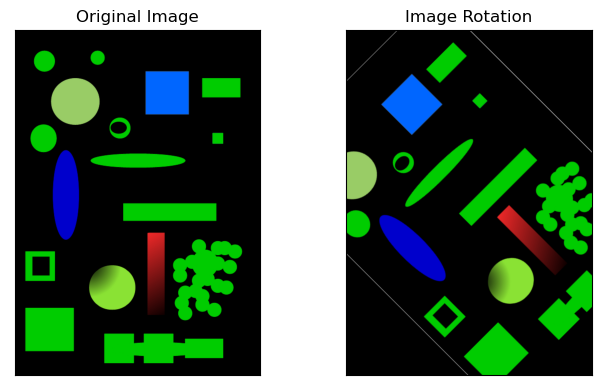

In [11]:
# faire tourner une image -45°
# Import the necessary Libraries

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 45
scale = 1

# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image.shape[1], image.shape[0]))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


Vous pouvez utiliser la bibliothèque imutils pour faire les rotations et d'autres fonctions facilement. Pour l'instaler: pip install imutils

# Dessiner sur l'image

In [18]:
# dessiner un rectangle
# Définir les coordonnées du rectangle (x, y, largeur, hauteur)
copy = image.copy()
x, y, width, height = 100, 100, 400, 200

# Dessiner le rectangle sur l'image
copy = cv2.rectangle(image, (x, y), (x+width, y+height), (255, 255, 255), 2)

# Afficher l'image avec le rectangle
cv2.imshow('Image avec rectangle', copy)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [19]:
# Définir les coordonnées du centre du cercle et le rayon
copy2 = image.copy()

center = (100, 100)
radius = 50

# Dessiner le cercle sur l'image
copy2 = cv2.circle(image, center, radius, (0, 0, 255), 2)

# Afficher l'image avec le cercle
cv2.imshow('Image avec cercle', copy2)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Filtrage d'image

* Blur
* Gaussian blur
* Median blur
* Sharpening
* Bilateral blur
* Bilateral filtering

In [24]:
# charger et afficher l'image "bois"

bois = cv2.imread("bois.png")
cv2.imshow("fenetre bois", bois)
cv2.waitKey(0)
cv2.destroyAllWindows()  # Close all OpenCV windows

In [6]:
# Utiliser la méthode "cv2.filter2D" avec un kernel de taille 2

# Appliquer le filtre à l'image
filtered_image = cv2.filter2D(bois, -1, 2)

# Afficher l'image filtrée
cv2.imshow('Image filtree', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
# Appliquer blur avec un kernel de taille 5x5

blur = cv2.blur(bois, (5, 5))
# Afficher l'image filtrée
cv2.imshow('Image filtree', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# gaussian blur

gaussian = cv2.GaussianBlur(bois, (5, 5), 0)
# Afficher l'image filtrée
cv2.imshow('Image filtree', gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# median blur
median = cv2.medianBlur(bois, 5)
# Afficher l'image filtrée
cv2.imshow('Image filtree', median)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [28]:
# sharpening

# Create a filter matrix
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the filter matrix to the image
sharpened = cv2.filter2D(bois, -1, kernel)

# Afficher l'image filtrée
cv2.imshow('Image filtree', sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [30]:
# bilateral filtering
bilateral = cv2.bilateralFilter(bois, 9, 75, 75)

# Afficher l'image filtrée
cv2.imshow('Image filtree', bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Seuillage d'image

En utilisant l'image "sudoku" appliquer:
* Binary Thresholding
* Otsu thresholding
* Adaptive thresholding

In [36]:
sudoku = cv2.imread("sudoku.jpg")

In [42]:
# appliquer un seuillage binaire d'un seuil de 127
_, threshold = cv2.threshold(sudoku,127,255,cv2.THRESH_BINARY)
# Afficher l'image filtrée
cv2.imshow('Image filtree', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
# appliquer un seuillage binaire d'un seuil de 30
_, threshold = cv2.threshold(sudoku,30,255,cv2.THRESH_BINARY)
# Afficher l'image filtrée
cv2.imshow('Image filtree', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
# appliquer un seuillage binaire d'un seuil de 240
_, threshold = cv2.threshold(sudoku,240,255,cv2.THRESH_BINARY)
# Afficher l'image filtrée
cv2.imshow('Image filtree', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

Qu'est ce que vous remarquez ?!

In [ ]:
on voit une image noir car nous avons donné une valeur trop grande

In [46]:
# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)

# Appliquer le seuillage Otsu
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Afficher l'image filtrée
cv2.imshow('Image filtree', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [48]:
# appliquer "Adaptive threshold"
# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage adaptatif
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Afficher l'image filtrée
cv2.imshow('Image filtree', adaptive)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Détection des bords

* Sobel
* Canny

In [3]:
# Charger l'image
madara = cv2.imread("madara.jpg")

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(madara, cv2.COLOR_BGR2GRAY)

# Appliquer un flou gaussien pour réduire le bruit
gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

# Calculer les dérivées de l'image en utilisant la méthode Sobel
sobel_x = cv2.Sobel(gaussian, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gaussian, cv2.CV_64F, 0, 1, ksize=3)

# Calculer la magnitude de gradient
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normaliser la magnitude de gradient dans la plage [0, 255]
gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Afficher l'image de gradient
cv2.imshow('Image de gradient', gradient_magnitude_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
# Canny
# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(madara, cv2.COLOR_BGR2GRAY)

# Appliquer un flou gaussien pour réduire le bruit
gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

# Détecter les bords en utilisant la méthode Canny
canny = cv2.Canny(gaussian, 0, 50)

# Afficher l'image de bords
cv2.imshow('Image de bords', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Détection des contours

In [71]:
import cv2
# charger l'image 02
# faites une recherche sur internet pour détecter les contours des objets dans image_02
# Charger l'image
image2 = cv2.imread("form_2.png")

In [73]:
gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

In [74]:
# Afficher l'image de bords
cv2.imshow('Image de bords', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [138]:
# noise removal
kernel = np.ones((3, 3),np.uint8)
closing = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel, iterations = 2)

In [139]:
# Détecter les bords en utilisant la méthode Canny
canny = cv2.Canny(closing, 0, 40)

In [140]:
# Afficher l'image de bords
cv2.imshow('Image de bords', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

#  Compter des objets

In [141]:
# Compter les objets
# Trouver les contours dans l'image binaire des bords
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Compter le nombre de contours trouvés
num_objects = len(contours)

print("Nombre d'objets :", num_objects)

Nombre d'objets : 6


In [142]:
# Copier l'image d'origine pour afficher les contours
image_with_contours = image2.copy()

# Parcourir tous les contours trouvés
for i, contour in enumerate(contours):
    # Dessiner le contour sur l'image
    cv2.drawContours(image_with_contours, contour, -1, (0, 255, 0), 2)

    # Afficher le numéro du contour sur l'image
    cv2.putText(image_with_contours, f"Contour {i+1}", (contour[0][0][0]-10, contour[0][0][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Afficher l'image avec les contours
cv2.imshow("Image avec contours", image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Challenge
Compter le nombre d'objets dans l'image 03 avec le code précédent.
- Qu'est ce que vous remarquez?
- Utiliser l'algorithme Watershed pour detecter et séparer les objets connectés.

In [19]:
import cv2
image3 = cv2.imread("image_03.jpg")

kernel = np.ones((3,3),np.uint8)

gray = cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [20]:
# noise removal
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.6*dist_transform.max(),255,0)


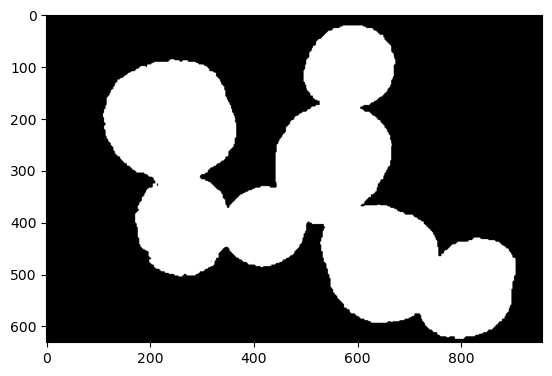

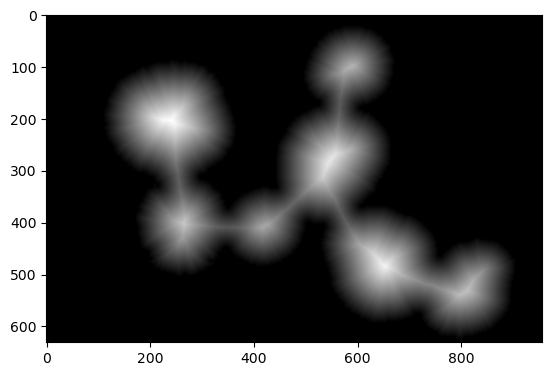

In [21]:
plt.imshow(opening, cmap='gray')
plt.show()
plt.imshow(dist_transform, cmap='gray')
plt.show()

In [22]:
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [23]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

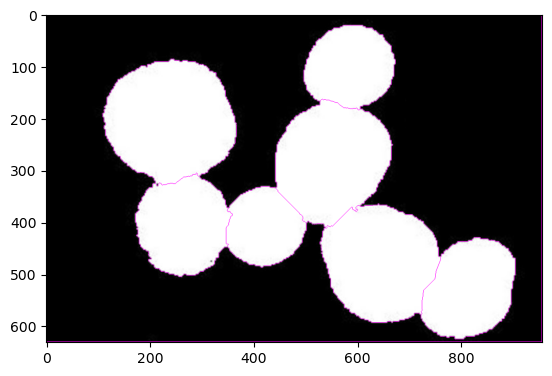

In [33]:
markers = cv2.watershed(image3,markers)
image3[markers == -1] = [255,0,255]
plt.imshow(image3, cmap='jet')

Bravo !